In [ ]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv("review.csv")

In [ ]:
df.head()

,comments,reviews
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever rea...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly did...,1


In [ ]:
df.shape

(6918, 2)

In [ ]:
df.isna().any()

comments    False
reviews     False
dtype: bool

In [ ]:
df['comments_1'] =df['comments'].str.lower()

In [ ]:
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [ ]:
df['comments_1'] = df['comments_1'].str.replace('\d+', '')

<ipython-input-9-48a07fe5ace6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comments_1'] = df['comments_1'].str.replace('\d+', '')


In [ ]:
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [ ]:
X = df['comments_1']
y = df['reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #scikit learn librery

In [ ]:
print("Shape of X-train : ",X_train.shape[0])
print("Shape of X-test : ",X_test.shape[0])

Shape of X-train :  4635
Shape of X-test :  2283


In [ ]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
test_data = count_vect.transform(X_test)

print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['able' 'abortion' 'about' 'absolute' 'absolutely' 'absurd' 'academy'
 'acceptable' 'accompaniment' 'according']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (4635, 1685)
the number of unique words  1685


In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(final_counts, y_train)
predict = clf.predict(test_data)
accuracy_score(y_test, predict)

0.9894875164257556

<Axes: >

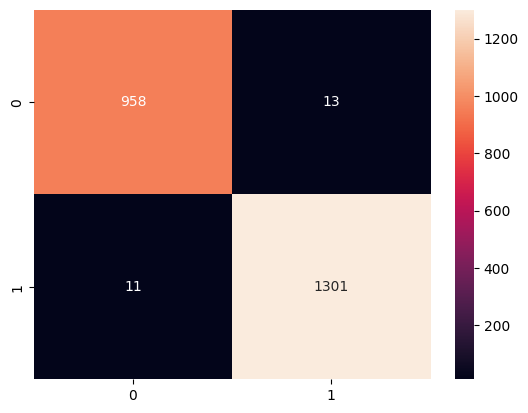

In [ ]:
result = confusion_matrix(y_test, predict)
sns.heatmap(result, annot=True, fmt="d")


In [ ]:
import pickle

In [ ]:
pickle.dump(count_vect, open("count_vectorizer.pkl", 'wb'))

# Loading Model

In [ ]:
# Load the CountVectorizer object
with open("count_vectorizer.pkl", 'rb') as cv_file:
    Count_vectorizer = pickle.load(cv_file)

# Load the model (Logistic Regression classifier)
with open("model_clf.pkl", 'rb') as model_file:
    model_clf = pickle.load(model_file)

In [ ]:
reviews = input("Enter a review : ")

Enter a review : This is very bad movies


In [ ]:
test = pd.Series(reviews)
type(test)

pandas.core.series.Series

In [ ]:
vector = Count_vectorizer.transform(test)
model_clf.predict(vector)

array([0])

Testing


In [ ]:
# 1. Preprocess the input text (replace 'your_input_text' with the actual movie review)
input_text = 'hey buddy it was great movie i littely loved it'
# ... Perform text preprocessing (cleaning, tokenization, etc.) ...

# 2. Transform the preprocessed text using the CountVectorizer
input_vector = Count_vectorizer.transform([input_text])

# 3. Make predictions using the trained classifier
predicted_class = model_clf.predict(input_vector)

# Check the predicted class label
if predicted_class == 0:
    print("It's a bad movie.")
elif predicted_class == 1:
    print("It's a good movie.")
else:
    print("Unable to classify.")


It's a good movie.
